<a href="https://colab.research.google.com/github/PrabaKDataScience/DeepLearning/blob/main/NLP/Basics/04_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM HAM - TEXT CLASSIFICATION 



1.   Input the data file 
2.   Explore the data
3. Preprocess the data (Stemming , Lemmatizing) 
4. Model building
5. Evaluating performance



# Input file

In [21]:
!wget https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/9_bag_of_words/spam.csv

--2022-11-02 07:15:17--  https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/9_bag_of_words/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480130 (469K) [text/plain]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 468.88K  --.-KB/s    in 0.004s  

2022-11-02 07:15:17 (105 MB/s) - ‘spam.csv.1’ saved [480130/480130]



In [22]:
import pandas as pd
import numpy as np

# Explore the data

In [23]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# Find out the categories of labels

df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

# Pre processing

In [25]:
df['Spam'] = df['Category'].map({'ham': 0, 'spam': 1})

# Alternate way for the same 
#df['Spam'] = df['Category'].apply(lambda x :  1 if x =='spam' else 0)

In [26]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Using sapcy and nltk 

In [27]:
import nltk 
from nltk.stem import PorterStemmer
import spacy
nlp = spacy.load('en_core_web_sm')
stemmer = PorterStemmer()


In [28]:
def preprocess_text(text):
  doc = nlp(text)
  tokens = [str(token) for token in doc]
  stemmed = [stemmer.stem(i)  for i in tokens]
  lemmatized = [token.lemma_ for token in doc]
  return ' '.join(lemmatized)

In [29]:
df['new']=df['Message'].apply(preprocess_text)

In [30]:
print(df.Message[1])
print(df.new[1])

Ok lar... Joking wif u oni...
ok lar ... joke wif u oni ...


## Measuring the word count in each e mail 

Usually the sapm mails have lot of words than normal mail

In [31]:
# Word count 

def get_count(text):
  doc = nlp(text)
  tokens = [token for token in doc]
  return len(tokens)

In [32]:
df['wc_1'] = df['Message'].apply(get_count)

In [33]:
df['wc_2'] = df['new'].apply(get_count)

In [34]:
df.loc[df['wc_1']!=df['wc_2']]

,Category,Message,Spam,new,wc_1,wc_2
10,ham,I'm gonna be home soon and i don't want to tal...,0,I be go to be home soon and I do not want to t...,28,29
13,ham,I've been searching for the right words to tha...,0,I 've be search for the right word to thank yo...,42,43
16,ham,Oh k...i'm watching here:),0,oh k ... i'm watch here :),7,8
89,ham,"Ela kano.,il download, come wen ur free..",0,"Ela kano . ,il download , come wen ur free ..",11,12
176,ham,Let me know when you've got the money so carlo...,0,let I know when you 've get the money so carlo...,15,16
...,...,...,...,...,...,...
5439,ham,Hey i've booked the 2 lessons on sun liao...,0,hey I 've book the 2 lesson on sun liao ...,11,12
5515,ham,You are a great role model. You are giving so ...,0,you be a great role model . you be give so muc...,62,63
5518,ham,"By the way, i've put a skip right outside the ...",0,"by the way , I 've put a skip right outside th...",31,32
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,ASKED 3mobile if 0870 CHATLINES inclu in free ...,40,41


In [35]:
df.iloc[89]

Category                                              ham
Message         Ela kano.,il download, come wen ur free..
Spam                                                    0
new         Ela kano . ,il download , come wen ur free ..
wc_1                                                   11
wc_2                                                   12
Name: 89, dtype: object

In [36]:
df.shape

(5572, 6)

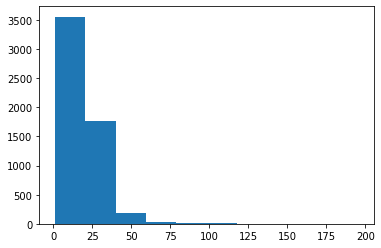

In [58]:
import matplotlib.pyplot as plt
plt.hist(df['wc_1'], bins= 10)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(
    df['new'], df['Spam'], test_size=0.2,random_state=33)

In [39]:
X_train.shape , y_train.shape,  X_test.shape


((4457,), (4457,), (1115,))

In [40]:
X_train[:4] # Pandas series

4183    urgent ! please call 0906346330 . your ABTA co...
1664                         s but mostly not like that .
1814                                 yes we be chat too .
5044            o ic lol . should play 9 door sometime yo
Name: new, dtype: object

# Vectorise

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
vectorizer = CountVectorizer()
X_train_vc = vectorizer.fit_transform(X_train.values)

In [52]:
print(' Vocabulary size : ', len(vectorizer.get_feature_names_out()))

 Vocabulary size :  6916


🎈  If you compare the vocabulary size from the original message it will be above the vocabulary size we have. Lemmatization brings some words to base form. Hence unique words count decreases

# Model : MultinomialNB

In [53]:
# model building 

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vc, y_train)

MultinomialNB()

In [54]:
X_test_vc = vectorizer.transform(X_test)  # Dont do fitting it here ; only transform 

In [56]:
preds = classifier.predict(X_test_vc)

### evaluate the performance

In [57]:
from sklearn.metrics import classification_report

report  = classification_report(y_true = y_test , y_pred  = preds, )

print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       962
           1       0.98      0.93      0.95       153

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Using Sklearn Pipeline


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
model  = Pipeline(
    [('Vectorizer', CountVectorizer()),
     ('Classifier', MultinomialNB())]
)

In [64]:
model.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', MultinomialNB())])

In [66]:
y_pred = model.predict(X_test)

In [69]:
print(classification_report(y_true = y_test , y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       962
           1       0.98      0.93      0.95       153

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

